# Investigación Corta 2

## Set de Datos

El set de datos escogido consiste en un dataset que busca correlacionar diferentes patrones socioeconómicos que inciden en un alto indice de suicidios. No obstante, se le dio un giro a los datos, y se van a utilizar de manera tal que se va a entrenar un modelo que determine por medio de estos valores si el suicidio lo cometió un hombre o una mujer.

El Set de datos se puede localizaz en este link: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


### Tratamiento incial de los datos (Limpieza)

In [107]:
import pandas as pd
df = pd.read_csv(r"C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Tarea2\suicide.csv")

In [108]:
df.shape

(27820, 12)

In [109]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,20,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,46,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,20,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,30,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [110]:
cols = ['generation','suicides_no','sex','age','suicides/100k','year']

In [111]:
df =df[cols]

In [112]:
df.head()

,generation,suicides_no,sex,age,suicides/100k,year
0,Generation X,21,male,20,6.71,1987
1,Silent,16,male,46,5.19,1987
2,Generation X,14,female,20,4.83,1987
3,G.I. Generation,1,male,75,4.59,1987
4,Boomers,9,male,30,3.28,1987


In [113]:
df.isnull().values.any()

False

# Modelo de Aprendizaje Simple

In [114]:
df['sex']=df['sex'].replace({'male': 0, 'female' :1})

In [115]:
df['generation'] = df['generation'].replace({'Generation X':0, 'Silent':1, 'G.I. Generation':2, 'Boomers':3, 'Generation Z':4, 'Millenials':5})

In [116]:
features = df[['suicides_no','age','generation','suicides/100k','year']]

In [117]:
labels = df['sex']

In [118]:
df.head()

,generation,suicides_no,sex,age,suicides/100k,year
0,0,21,0,20,6.71,1987
1,1,16,0,46,5.19,1987
2,0,14,1,20,4.83,1987
3,2,1,0,75,4.59,1987
4,3,9,0,30,3.28,1987


In [119]:
features.head()

,suicides_no,age,generation,suicides/100k,year
0,21,20,0,6.71,1987
1,16,46,1,5.19,1987
2,14,20,0,4.83,1987
3,1,75,2,4.59,1987
4,9,30,3,3.28,1987


In [120]:
features.tail()

,suicides_no,age,generation,suicides/100k,year
27815,107,46,0,2.96,2014
27816,9,75,1,2.58,2014
27817,60,10,4,2.17,2014
27818,44,10,4,1.67,2014
27819,21,66,3,1.46,2014


In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13) 

In [123]:
X_train.shape

(20865, 5)

In [124]:
X_test.shape

(6955, 5)

In [125]:
y_train.shape

(20865,)

In [126]:
y_test.shape

(6955,)

# Decision Tree Classifier

El primer modelo de entrenamiento que se utiliza es el de tipo árbol. Es un modelo que se basa en preguntas condicionales seguidas de una decisión. Este tipo de modelo es muy util para decisiones de tipos binarias (como lo es nuestro set de datos.

Se pretenden iterar las variables **max_depth / max_leaf_nodes / min_samples_leaf** para variara la precisión del modelo de predicción.

In [127]:
from sklearn.tree import DecisionTreeClassifier

**max_depth = 4
max_leaf_nodes = 0
min_samples_leaf = 1**


In [128]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 4)

In [129]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
y_predict = DecisionTreeModel.predict(X_test)

In [132]:
accuracy_score(y_test, y_predict)

0.7384615384615385

In [133]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=['men','women'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'], shell=True)

0

<img src='simple_tree.png' width=1000px>

**max_depth = 5
max_leaf_nodes = 2
min_samples_leaf = 4**

In [147]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes= 2, min_samples_leaf = 4 )

In [148]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [149]:
y_predict = DecisionTreeModel.predict(X_test)
accuracy_score(y_test, y_predict)

0.7111430625449318

**max_depth = 5
max_leaf_nodes = 8
min_samples_leaf = 8**

In [150]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes= 8, min_samples_leaf = 8 )

In [151]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [152]:
y_predict = DecisionTreeModel.predict(X_test)
accuracy_score(y_test, y_predict)

0.7298346513299784

**max_depth = 10
max_leaf_nodes = 16
min_samples_leaf = 16**

In [193]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes= 16, min_samples_leaf = 16 )

In [194]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [195]:
y_predict = DecisionTreeModel.predict(X_test)
accuracy_score(y_test, y_predict)

0.7436376707404745

In [196]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=['men','women'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'], shell=True)

0

<img src = 'simple_tree.png' width = 1000px>

### Table1

<img src='Decision_tree_results.png'>

Algunos detalles importantes de notar es que por medio de una grafica se pueden determinar características que tal vez no sean necesarias al definir todo el modelo, como por ejemplo la profundidad del árbol. Si bien es cierto colocamos una profundidad de 10, en el gráfico se observa que para obtener la precisión que obtuvimos solo necesitamos una profundidad de 4, por lo que se puede modificar esa variable para que el consumo computacional sea menor.

In [160]:
importances_DT = pd.DataFrame({'feature' : X_train.columns, 'importance':DecisionTreeModel.feature_importances_})

In [161]:
importances_DT = importances_DT.sort_values('importance', ascending = False).set_index('feature')
importances_DT.head()

,importance
feature,
suicides/100k,0.772481
age,0.166673
suicides_no,0.060846
generation,0.000000
year,0.000000


Como se puede observar en la tabla anterior, se determina que las variables que mas influyen para determinar si el asesinato fue un hombre o una mujer son **suicides/100k** y **age**. Por lo que se va a realizar una prueba en la que solo se van a dejar esas dos variables y se va a utilizar la configuración con mejor precisión, para determinar si se mantiene este valor.

In [169]:
features_new = df[['age','suicides/100k',]]

In [171]:
features_new.head()

,age,suicides/100k
0,20,6.71
1,46,5.19
2,20,4.83
3,75,4.59
4,30,3.28


In [172]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(features,labels, random_state=13) 

In [173]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes= 16, min_samples_leaf = 16 )
DecisionTreeModel.fit(X_train_new,y_train_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [174]:
y_predict_new = DecisionTreeModel.predict(X_test_new)
accuracy_score(y_test_new, y_predict_new)

0.7436376707404745

Como se puede observar **la precisión de predicción se mantiene intacta, y el consumo computacional es menor,** esto se observa en el arbol de decisión.

In [175]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree_new.dot', feature_names=features.columns,impurity=False,class_names=['men','women'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree_new.dot', '-o', 'simple_tree_new.png'], shell=True)

0

<img src = 'simple_tree_new.png' width=1000px>

# Random Forest

A diferencia del modelo anterior, este tipo consiste en una serie de arboles que se generan de manera aleatoría con mpultiples decisiones y condiciones que mejoran la precisión de predicción ya que cuenta con más alternativas. Sin embargo, el consumo computacional es mayor.

In [176]:
features.head()

,suicides_no,age,generation,suicides/100k,year
0,21,20,0,6.71,1987
1,16,46,1,5.19,1987
2,14,20,0,4.83,1987
3,1,75,2,4.59,1987
4,9,30,3,3.28,1987


In [177]:
labels.head()

0    0
1    0
2    1
3    0
4    0
Name: sex, dtype: int64

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)

In [190]:
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [191]:
y_predict = RandomForestModel.predict(X_test)

In [192]:
accuracy_score(y_test,y_predict)

0.7611790079079799

In [53]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,impurity=False,class_names=['men','women'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'], shell=True)

0

<img src='complete_tree.png' width=1000px>

Como se puede observar la precicisión mejoró un 2% con respecto al árbol de decisiones simple. En la imagen se puede observar la cantidad de árboles que se tuvieron que generar para optimizar este modelo. Es útil para trabajar con set de datos pequeños, ya que la cantidad de árboles que se podrían generar complicarían el cálculo computacional.

# K-Nearest Neighbors

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [198]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(features, labels, random_state=42)

In [208]:
training_accuracy = []
test_accuracy = []

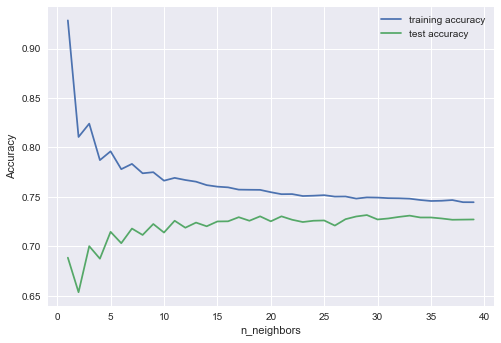

In [209]:
import matplotlib.pyplot as plt
neighbors_settings = range(1, 40)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_knn, y_train_knn)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train_knn, y_train_knn))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test_knn, y_test_knn))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

El metodo KNN no fue tan efectivo debido al set de datos ya que funciona mejor para conjuntos con multiples tomas de decisiones, en este caso es solo hombre o mujer.
Es importante determinar por medio de la gráfica anterior que no es necesario utilizar tantos vecinos para obtener el mejor de los resultados. Es por esto que se eige una cantidad k=15 en donde se observa donde se estabilizan, tanto el traning accuracy como el test accuracy. Sin embargo obtenemos un valor cecano a 73% de precisión, menor poe 3% al de Random Forest.

# Logistic Regression

In [266]:
from sklearn.linear_model import LogisticRegression

In [290]:
logisticRegressionModel= LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [291]:
print("Training set score: {:.3f}".format(logisticRegressionModel.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logisticRegressionModel.score(X_test, y_test)))

Training set score: 0.717
Test set score: 0.724


In [292]:
logisticRegressionModel= LogisticRegression(solver='saga').fit(X_train, y_train)

c:\users\vernyjmo\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [293]:
print("Training set score: {:.3f}".format(logisticRegressionModel.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logisticRegressionModel.score(X_test, y_test)))

Training set score: 0.701
Test set score: 0.703


In [294]:
logisticRegressionModel= LogisticRegression(solver='lbfgs').fit(X_train, y_train)

In [295]:
print("Training set score: {:.3f}".format(logisticRegressionModel.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logisticRegressionModel.score(X_test, y_test)))

Training set score: 0.717
Test set score: 0.724


Se intenta modificar la precisión del resultado cambiando el algoritmo con el que se corre el modelo. No obstante, se observa como casi no existe variación en la misma. La razón de esto se observa en el siguiente gráfico, y va muy de la mano por la naturalidad de los datos, ya que no son muchos estados de decisión los que debe abarcar.

Es por esto que por más que se escoja un valor distinto de **C** no va a existir una variación grande en los resultados. Esto se observa en la siguiente figura.

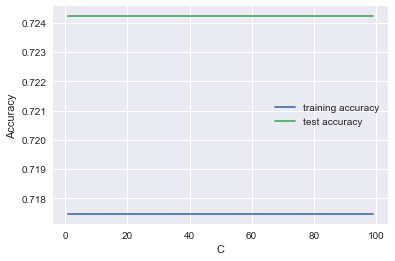

In [297]:
import matplotlib.pyplot as plt
%matplotlib inline

training_acuracy = []
test_acuracy = []

rango = range(1, 100)
for c in rango:
    logisticRegressionModel = LogisticRegression(C=c, solver='liblinear')
    logisticRegressionModel.fit(X_train, y_train)
    training_acuracy.append(logisticRegressionModel.score(X_train, y_train))
    test_acuracy.append(logisticRegressionModel.score(X_test, y_test))
plt.plot(rango, training_acuracy, label="training accuracy")
plt.plot(rango, test_acuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

# Extremley Randomized Trees

Este modelo las divisiones en como se van a clasificar cada árbol de decisión se efectua de manera una poco distinta a lo ya visto. 

Todo se realiza de la misma manera que los otor modelos, sin embargo, a la hora de escoger lo el subconjunto de **features** este va a ser aleatorio y no va a tener una salida específica. Además cada umbral se selecciona de manera aleatoria, para cada entrada del modelo, haciéndolo mas complejo de ejecutar en términos de recursos computacionales.

In [71]:
from sklearn.ensemble import ExtraTreesClassifier



In [210]:
ExtraTreesModel = ExtraTreesClassifier(n_estimators=15, max_depth = 10, max_leaf_nodes= 16, min_samples_leaf = 16)

In [211]:
ExtraTreesModel.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=10, max_features='auto', max_leaf_nodes=16,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=16, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [212]:
y_predict = ExtraTreesModel.predict(X_test)

In [213]:
accuracy_score(y_test,y_predict)

0.7220704529115745

In [226]:
ExtraTreesModel = ExtraTreesClassifier(n_estimators=15, max_depth=None, max_features=4, min_samples_split=3, random_state=0)


In [227]:
ExtraTreesModel.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features=4, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [228]:
y_predict = ExtraTreesModel.predict(X_test)

In [229]:
accuracy_score(y_test,y_predict)

0.7518332135154565

Es importante denotar como una misma configración n funciona para todos los modelos, por ejemplo utilizando la mejor configuracion del **Arbol simple de decision** obtenemos una precision 4% mas baja de la que podriamos alcanzar utilizando otra configuracion. 
Para estos tipos de algoritmos de tipo ensamble **la profundidad del arbol, y la aleatoridad afecta mucho el resultado.**

# AdaBoost

Este modelo consiste en en secuencias de errores de múltiples combinaciones de los datos. Se le asigna un peso específico a cada salida dependiendo de la importancia que tenga con el modelo, y se unen al final para generar una predicción final.

In [247]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoostModel = AdaBoostClassifier(n_estimators = 100)

In [248]:
AdaBoostModel.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [249]:
y_predict = AdaBoostModel.predict(X_test)

In [250]:
accuracy_score(y_test,y_predict)

0.715312724658519

In [251]:
AdaBoostModel = AdaBoostClassifier(n_estimators = 500)

In [252]:
AdaBoostModel.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=500, random_state=None)

In [253]:
y_predict = AdaBoostModel.predict(X_test)

In [254]:
accuracy_score(y_test,y_predict)

0.7227893601725377

In [259]:
AdaBoostModel = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.5)

In [260]:
AdaBoostModel.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=500, random_state=None)

In [261]:
y_predict = AdaBoostModel.predict(X_test)

In [262]:
accuracy_score(y_test,y_predict)

0.7181883537023724

# Conclusions 


<img src='final.png'>

- Random Forest es el model que mejor se comporta para predecir el set de datos presentado, esto debido a que estos solo presentan dos estados de salida, 